In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
import time
from dateutil import parser
import datetime
from transformers import pipeline
from sklearn.metrics import precision_recall_fscore_support
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score

In [2]:
df = pd.read_csv('df_full.csv', encoding='utf-8')

In [3]:
from transformers import pipeline

# Importing a twitter-specific machine learning model from transformers
sentiment_analysis = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")


In [4]:
l = sentiment_analysis("I hate you but I love you")
l[0]['label']

'POSITIVE'

In [5]:
df= df.drop(columns=['score'])

In [6]:
df.head()

,sentiment,Text
0,Positive,ZUKA ZAMA! 🇺🇸🇺🇸🇺🇸❤️🤍💙
1,Positive,Zip ties!
2,Positive,Zero sugar options would be nice as well
3,Positive,Zendaya by cozz ft. J Cole 🐐
4,Positive,Zayunmmmm who are these people 🥵😍


In [7]:
result_list = []
def sentiment():
    for i in range(len(df)):
        roberta = df['Text'][i]
        result = sentiment_analysis(roberta)
        result_list.append(result)

In [8]:
sentiment()

In [9]:
df['roberta_list']=result_list

In [10]:
df['roberta_list']= pd.DataFrame (result_list, columns = ['roberta'])

In [11]:
df.head()

,sentiment,Text,roberta_list
0,Positive,ZUKA ZAMA! 🇺🇸🇺🇸🇺🇸❤️🤍💙,"{'label': 'POSITIVE', 'score': 0.998778760433197}"
1,Positive,Zip ties!,"{'label': 'POSITIVE', 'score': 0.9849556088447..."
2,Positive,Zero sugar options would be nice as well,"{'label': 'NEGATIVE', 'score': 0.9930645823478..."
3,Positive,Zendaya by cozz ft. J Cole 🐐,"{'label': 'POSITIVE', 'score': 0.9977518916130..."
4,Positive,Zayunmmmm who are these people 🥵😍,"{'label': 'NEGATIVE', 'score': 0.9955522418022..."


In [12]:
df_split = df['roberta_list'].apply(pd.Series)
df2 = pd.concat([df_split, df["roberta_list"].apply(pd.Series)], axis=1)
df['label']=df_split['label']
df['score']=df_split['score']
df=df[['sentiment', 'Text','label','score']]

In [13]:
    
## roberta labels without neutral class
def label_detect(l):
    if l == 'POSITIVE':
        return 'Positive'
    else:
        return 'Negative'

In [14]:
df['roberta_labels'] =df['label'].apply(label_detect)

In [15]:
confusion_matrix(df['sentiment'],df['roberta_labels'])

array([[ 1318,   293],
       [ 3784, 24010]])

In [16]:
df.head()

,sentiment,Text,label,score,roberta_labels
0,Positive,ZUKA ZAMA! 🇺🇸🇺🇸🇺🇸❤️🤍💙,POSITIVE,0.998779,Positive
1,Positive,Zip ties!,POSITIVE,0.984956,Positive
2,Positive,Zero sugar options would be nice as well,NEGATIVE,0.993065,Negative
3,Positive,Zendaya by cozz ft. J Cole 🐐,POSITIVE,0.997752,Positive
4,Positive,Zayunmmmm who are these people 🥵😍,NEGATIVE,0.995552,Negative


In [17]:
print(f1_score(df['sentiment'],df['roberta_labels'], average="macro"))
print(precision_score(df['sentiment'],df['roberta_labels'], average="macro"))
print(recall_score(df['sentiment'],df['roberta_labels'], average="macro")) 

0.6572065359258727
0.6231369709411364
0.8409904481704473


In [18]:
precision, recall, fscore, support = score(df['sentiment'],df['roberta_labels'])

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
f1_score(df['sentiment'],df['roberta_labels'] ,average='weighted')


precision: [0.25833007 0.98794388]
recall: [0.81812539 0.86385551]
fscore: [0.39267094 0.92174213]
support: [ 1611 27794]


0.8927561222884659

In [19]:
from sklearn.metrics import *
#Checking performance our model with classification report
print(classification_report(df['sentiment'],df['roberta_labels']))



              precision    recall  f1-score   support

    Negative       0.26      0.82      0.39      1611
    Positive       0.99      0.86      0.92     27794

    accuracy                           0.86     29405
   macro avg       0.62      0.84      0.66     29405
weighted avg       0.95      0.86      0.89     29405



In [20]:
y_test= df['sentiment']
y_pred= df['roberta_labels']

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks


    box_labels = [f"{v1}{v2}".strip() for v1, v2 in zip(group_labels,group_counts)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap='Blues',cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)




In [22]:

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)


[[ 1318   293]
 [ 3784 24010]]


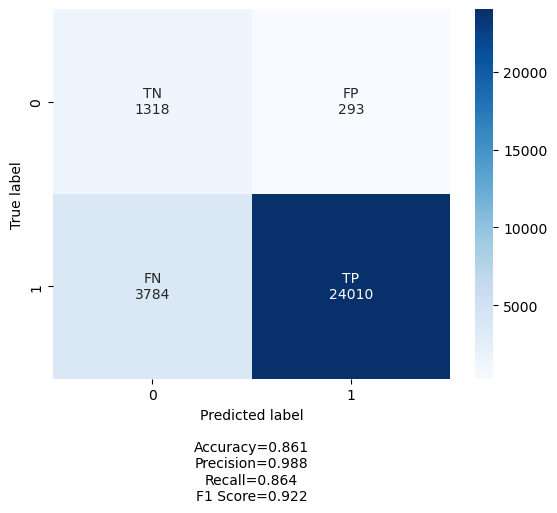

In [23]:
labels = ['TN','FP','FN','TP']
categories = ["0", "1"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

In [24]:
print(classification_report(df['sentiment'],df['roberta_labels']))


              precision    recall  f1-score   support

    Negative       0.26      0.82      0.39      1611
    Positive       0.99      0.86      0.92     27794

    accuracy                           0.86     29405
   macro avg       0.62      0.84      0.66     29405
weighted avg       0.95      0.86      0.89     29405

